In [1]:
import os
import sys
import urllib.request
import json
import re

client_id = "ZfhA97N3n2D26_pj344P"
client_secret = "WjSgWdzg65"

keyword = input('블로그 검색어를 입력해주세요')

encText = urllib.parse.quote(keyword)

tlist = []
llist = []
dlist = []


#1000페이지 검색하기위해서 만들어준다.
for pagenum in range(1,1000,100):
    #만약 에러가 발생하면 저장이 안되기때문에 에러난건 제외하고 저장하기 위해서 
    try:
    
        #문서에 들어가보면 요청변수가 여러개있음 그걸 이용해서 하면된다. 예를 들면 display는 검색결과출력건수를 지정하는데 최대 100이다.
        # sort는 정렬옵션인데 sim을 넣으면 유사도순이고 dateㄴ는 날싸순이다.
        url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)# json 결과   블로그 1~100  101~200
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",client_id)
        request.add_header("X-Naver-Client-Secret",client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            jtemp = response_body.decode('utf-8')
            jdata = json.loads(jtemp)

            jdata['items']
                
                
            #여기도 문서에 적혀있다. 출력결과가 어떤 변수로 저장되는지 그거 참고해서하면된다.
            #https://developers.naver.com/docs/serviceapi/search/blog/blog.md#%EB%B8%94%EB%A1%9C%EA%B7%B8
            #모르겠으면 여기 들어가서 쭉 내려보자...
            for temp in jdata['items']:  
                hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                tdata = temp['title']
                ldata = temp['link']
                ddata = hangul.sub(r'',temp['description'])

                tlist.append(tdata)
                llist.append(ldata)
                dlist.append(ddata)

        else:
            print("Error Code:" + rescode)
            
    except:
        print('Error')
        
        

result = []
for temp in range(len(tlist)):
    temp1 = []
    temp1.append(tlist[temp])
    temp1.append(llist[temp])
    temp1.append(dlist[temp])
    
    result.append(temp1)
    
print(result)

f = open('{0} - 네이버API 블로그검색.csv'.format(keyword) , 'w', encoding='utf-8')
f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
for temp in result:    
        f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
f.close()

블로그 검색어를 입력해주세요커피
[['부산 기장 카페 가볼만한곳 공극샌드<b>커피</b>', 'https://blog.naver.com/80sunjin?Redirect=Log&logNo=222505758052', '공극샌드커피 지난번까지 다른 카페에 주로 갔었는데 이번엔 새로운 곳에 한번 가보자며 ㅎㅎ 노란 파라솔이 인상깊었던 분위기 좋은 카페  부산 기장 카페 가볼만한곳 공극샌드커피 글사진 이름부터 '], ['강릉 중앙시장 선물 <b>커피</b>빵 엄지척!', 'https://blog.naver.com/woaiheejun?Redirect=Log&logNo=222469523700', '강릉 중앙시장 선물 커피빵 엄지척 며칠 전 친구가 아이들을 데리고 강릉에 간다길래 오랜만에 옆쪽에는 커피빵을 파는 강릉당이 있었답니다 민트색의 간판에 카페에서 봤음직한 조명이 장착되어있어 '], ['가산디지털단지 인크<b>커피</b> 가산 중정이 있는 공간', 'https://blog.naver.com/nowwegom?Redirect=Log&logNo=222508206454', '바로 가산 인크커피인데 하남미사점에 이어 새로 오픈한 곳이다 갈만한 카페가 거의 없었던 지역이라 반갑기도 했고 호기심이 생겨 찾아가 보았다 인크커피 가산점 아메리카노 원 주소 서울 금천구 '], ['가정용<b>커피</b>머신기, 드립&amp;캡슐 2 IN 1 라이녹스', 'https://blog.naver.com/lubkhaki?Redirect=Log&logNo=222501712503', '가정용커피머신기 라이녹스 현대인답게 하루에 보통 잔의 커피를 마시고 있다 그렇다 보니 당연히 몇 번이나 가정용커피머신기 구입을 고려했더랬다 하지만 예전엔 일주일에 보통 번 외출을 했기 '], ['풍미깊었던 제주도 <b>커피</b> 맛집', 'https://blog.naver.com/hloveh01?Redirect=Log&logNo=222485445083', '얼마 전 친구와 제주도로 놀러 갔다가 에서 유명세를 탄 제주

In [4]:
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


import konlpy.tag

def get_tags(text, ntags=50): #태그를 나눈다. 태그란? 각 글자를 의미
    #기본값을 50으로 설정해준다. ntags는 단어수를 의미한다.
    spliter = Okt() #Open Korean Text -> 한국어 분석기
    nouns = spliter.nouns(text) # 명사로 나눈다
    count = Counter(nouns) #명사의 갯수를 센다.
    return dict(count.most_common(ntags)) # 딕셔너리형태로 갯수를 반환해준다.


def clean_str(s): #특수기호와 영어를 제거해준다.
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)# 띄어쓰기를 넣어줘야 띄어쓰기가 되서 나온다.
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE) #이건 영어 제거였나 그럼
    s = cp.sub(r' ',s)
    return s.strip() #쓸데없는거 지우고 리턴해준다.


#####워드클라우드

def Wordcloud(data , savename , maskname=''):
    #워드클라우드는 폰트가 중요하다. 왜냐하면 보여지는게 중요하기때문
    if maskname == '': #마스크이름(사진)이 없으면 그냥 글자만 나오게하고
        wc = WordCloud( font_path='font/BMEULJIROTTF.ttf' , background_color='white', max_font_size=60, colormap='copper')
    else:
        maskimg = np.array(Image.open(maskname)) #마스크(사진)이 있으면 불러오고 그에 맞게 만들어준다.
        wc = WordCloud(font_path='font/BMEULJIROTTF.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='copper')
        
    #여기서부터는 시각화 부분이라 몰라도되고 그냥 가져다 쓰자
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file(savename + ".png")

In [3]:
textdata = ''

#크롤링해서 나온 데이터를 하나로 합쳐주는 역할,,, 이어쓰기? 라고 보면될듯
for temp in result:
    print(temp[2])
    if '커피' in temp[2]:
        continue
    else:
        textdata = textdata + ' ' + temp[2] 
    #2번이 description 그니까 설명 부분이다. 강사님은 설명부분 가져다씀

    
tresult = get_tags(textdata)
print(tresult)

공극샌드커피 지난번까지 다른 카페에 주로 갔었는데 이번엔 새로운 곳에 한번 가보자며 ㅎㅎ 노란 파라솔이 인상깊었던 분위기 좋은 카페  부산 기장 카페 가볼만한곳 공극샌드커피 글사진 이름부터 
강릉 중앙시장 선물 커피빵 엄지척 며칠 전 친구가 아이들을 데리고 강릉에 간다길래 오랜만에 옆쪽에는 커피빵을 파는 강릉당이 있었답니다 민트색의 간판에 카페에서 봤음직한 조명이 장착되어있어 
바로 가산 인크커피인데 하남미사점에 이어 새로 오픈한 곳이다 갈만한 카페가 거의 없었던 지역이라 반갑기도 했고 호기심이 생겨 찾아가 보았다 인크커피 가산점 아메리카노 원 주소 서울 금천구 
가정용커피머신기 라이녹스 현대인답게 하루에 보통 잔의 커피를 마시고 있다 그렇다 보니 당연히 몇 번이나 가정용커피머신기 구입을 고려했더랬다 하지만 예전엔 일주일에 보통 번 외출을 했기 
얼마 전 친구와 제주도로 놀러 갔다가 에서 유명세를 탄 제주도 커피 맛집을 찾았다 신선한 식재료로 곧장 제주도 커피 맛집의 메뉴판을 살펴보기 시작했다 각종 디저트는 몰론이고 음료도 다양했다 
섬유유연제 구매하면서 제가 평소 좋아하던 케냐 원두가 담긴 드립백 커피도 판매하길래 사봤는데요 저렴한 가격에 비해 맛과 향이 특히 좋은 것 같아 추천해볼까 해여 바로 여기커피 드립백인데요 상자에 
이처럼 커피에 대해 재미난 말들이 참 많은데요 아무래도 요즘은 주변에 카페도 많고 다양한 커피음료가 많은 만큼 커피를 좋아하는 인구가 더더욱 늘어나고 있기 때문이 아닐까해요 저 또한 커피를 워낙 
일산 가성비 좋은 포트캔커피  폭탄카스테라 일산 라페스타 쪽에 갔다가 오픈 이벤트를ㅇ하고 있어서 무조건 들어가게 되었던 포트캔커피 라페스타점 인데요 이날하고 다음날까지 스페셜티커피 를 
털썩 자리를 잡기보다는 심플한 느낌의 실내를 구경했는데 서귀포 커피 맛집답게 향긋한 원두냄새와 이어서 깔끔한 머신들에 시선을 돌려보았는데 쌉싸름한 서귀포 커피 맛집답게 주문을 하면 빠르게 
홈카페에 빠질 수 없는 커피 저는 커피 캡슐을 통해 에스프레소를 추출하는

{}


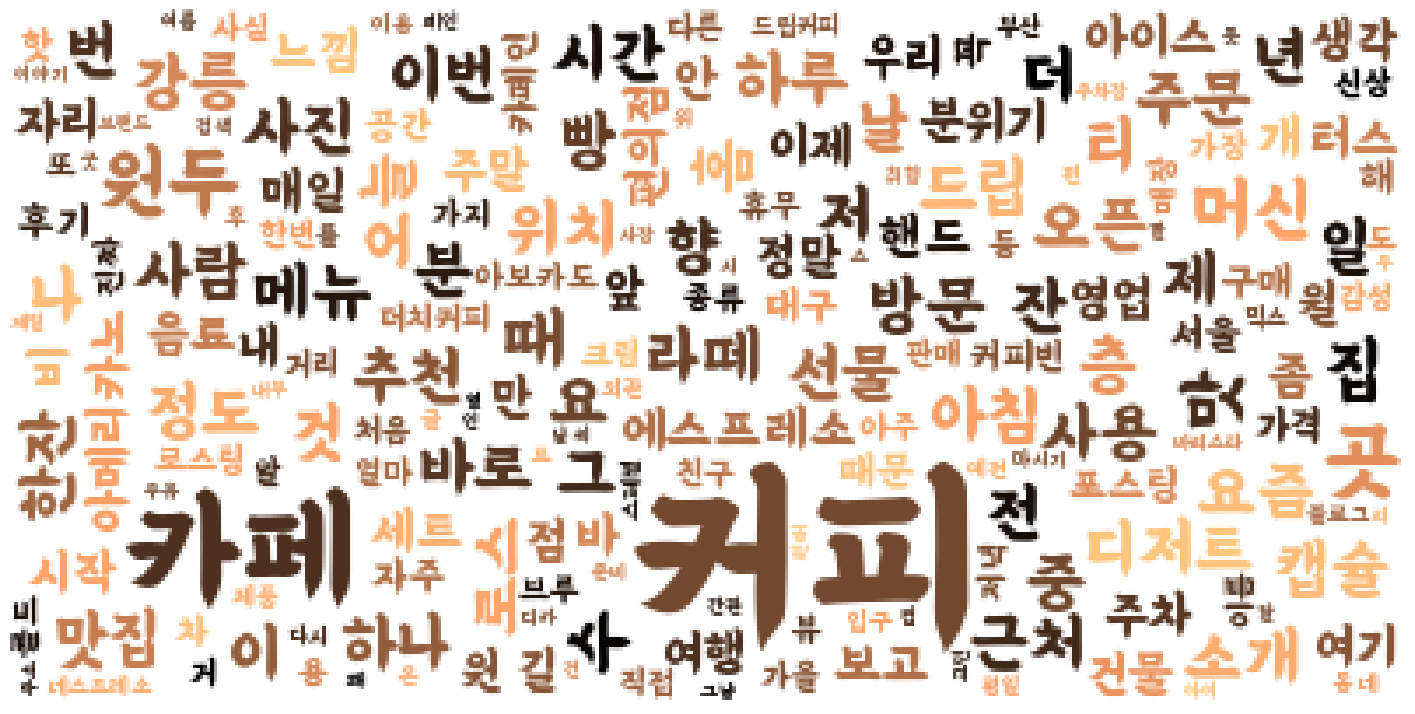

In [13]:
tresult = get_tags(textdata,ntags=200)
Wordcloud(tresult,'커피블로그')
#위에서 정의해준 함수를 보면 된다.... 커피블로그는 사진이 만들어지는 이름

In [1]:
# 불용어 리스트 = ['곳','수','것','전','이'] 이런거 정하고 워드클라우드하면 원하는것만 도출가능